In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_610c2bc559504742a5082bda00448ef3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tQu1nKE8tq5etKMGR4uiHJIM5c1tpXS4rCMJzRimC_wk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_610c2bc559504742a5082bda00448ef3.get_object(Bucket='lifeexpectancy-donotdelete-pr-rbxmmkathfj5zg',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
Life_data= pd.read_csv(body)
Life_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [86]:
Life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [87]:
Life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [88]:
Life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [89]:
Life_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [90]:
Life_data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [91]:
Life_data = Life_data.drop('Year', axis = 1)

In [92]:
Life_data = Life_data.drop(['Status'], axis=1)

In [93]:
Life_data = Life_data.drop(['Country'], axis=1)
Life_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [94]:
Life_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Text(0, 0.5, 'Life expectancy')

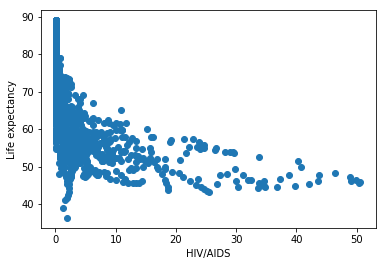

In [95]:
plt.scatter(Life_data[' HIV/AIDS'], Life_data['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

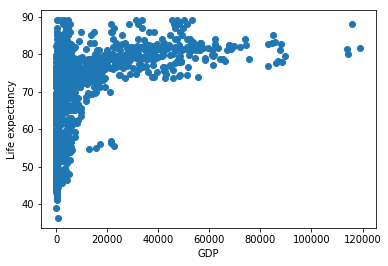

In [96]:
plt.scatter(Life_data.GDP, Life_data['Life expectancy '])
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

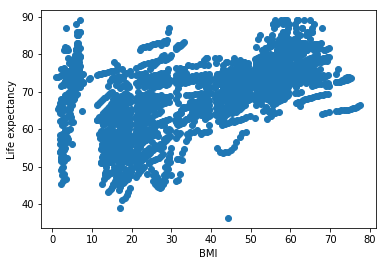

In [97]:
plt.scatter(Life_data[' BMI '], Life_data['Life expectancy '])
plt.xlabel('BMI')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

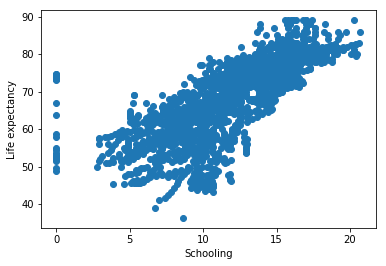

In [98]:
plt.scatter(Life_data['Schooling'], Life_data['Life expectancy '])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

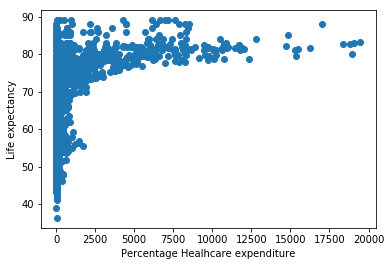

In [99]:
plt.scatter(Life_data['percentage expenditure'], Life_data['Life expectancy '])
plt.xlabel('Percentage Healhcare expenditure')
plt.ylabel('Life expectancy')

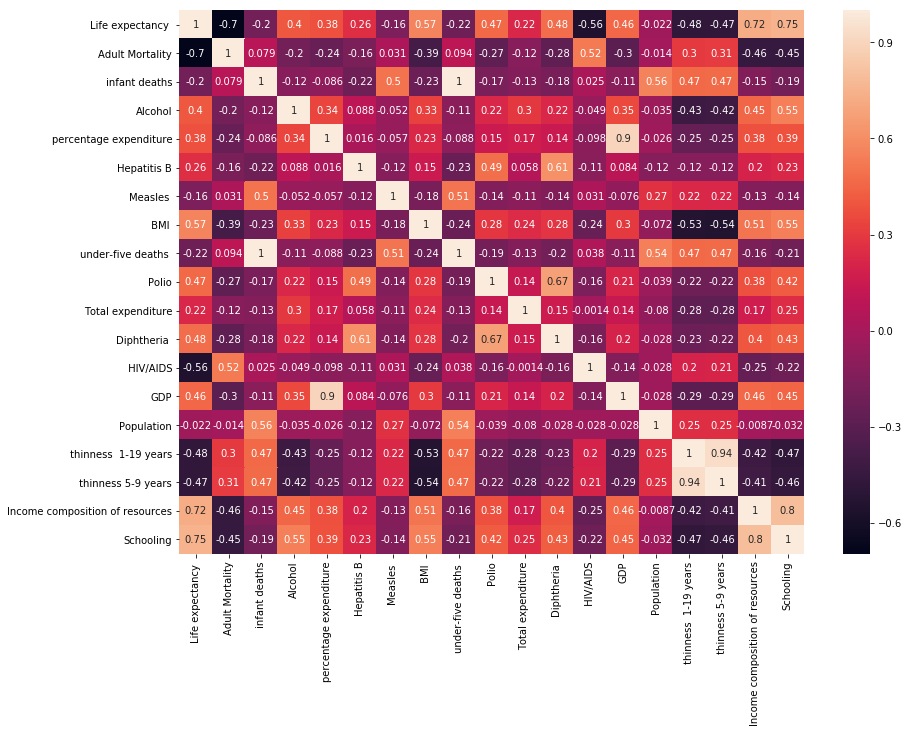

In [100]:
plt.figure(figsize = (14, 10))
sns.heatmap(Life_data.corr(), annot = True)

In [101]:
Y = Life_data['Life expectancy ']
X = Life_data.drop('Life expectancy ', axis = 1)

In [102]:
X.shape , Y.shape

((2938, 18), (2938,))

In [103]:
X.isnull().head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [104]:
X.isnull().sum()

Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [105]:
Y.isnull().sum()

10

In [106]:
Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [107]:
X.fillna(value = X.mean(), inplace = True)

In [108]:
X.isnull().sum()

Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [109]:
Y.fillna(value = Y.mean(), inplace = True)

In [110]:
Y.isnull().sum()

0

Text(0.5, 1.0, 'Polio')

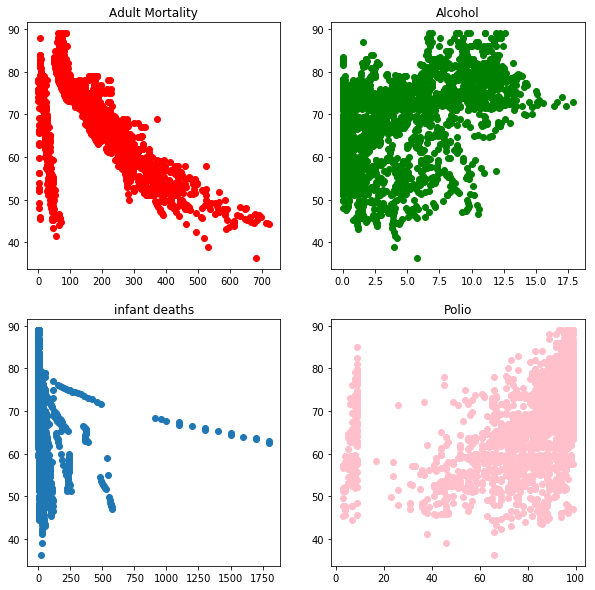

In [111]:
fig, axs =plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0, 0].scatter(Life_data['Adult Mortality'], Life_data['Life expectancy '],c='red')
axs[0, 0].set_title('Adult Mortality')

axs[0, 1].scatter(Life_data['Alcohol'], Life_data['Life expectancy '],c='green')
axs[0, 1].set_title('Alcohol')

axs[1, 0].scatter(Life_data['infant deaths'], Life_data['Life expectancy '])
axs[1, 0].set_title('infant deaths')

axs[1, 1].scatter(Life_data['Polio'], Life_data['Life expectancy '],c='pink')
axs[1, 1].set_title('Polio')

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lm = LinearRegression()

In [116]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
print(lm.intercept_)

54.38558954601439


In [118]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Adult Mortality,-2.036003e-02
infant deaths,1.142835e-01
Alcohol,1.184965e-01
percentage expenditure,9.743453e-05
Hepatitis B,-2.119461e-02
Measles,-2.433922e-05
BMI,3.913180e-02
under-five deaths,-8.716570e-02
Polio,3.721543e-02
Total expenditure,5.997364e-02


In [119]:
from sklearn import metrics

In [120]:
predictions = lm.predict(X_test)

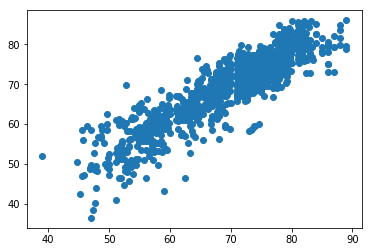

In [121]:
plt.scatter(Y_test,predictions)

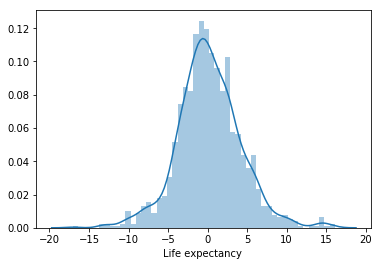

In [122]:
sns.distplot((Y_test-predictions),bins=50);

In [123]:
print('Coefficients: \n', lm.coef_)
print('MAE:', metrics.mean_absolute_error(Y_test,predictions))
print('MSE:', metrics.mean_squared_error(Y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

Coefficients: 
 [-2.03600258e-02  1.14283514e-01  1.18496462e-01  9.74345298e-05
 -2.11946052e-02 -2.43392236e-05  3.91317987e-02 -8.71657025e-02
  3.72154284e-02  5.99736430e-02  3.97437466e-02 -4.31589747e-01
  4.94380223e-05  1.53315761e-09 -1.19299600e-01  3.40095267e-02
  5.61382643e+00  7.10536925e-01]
MAE: 3.0542524137571188
MSE: 16.546293004197302
RMSE: 4.067713486001356


In [124]:
print(lm.intercept_)

54.38558954601439


In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
clfr=RandomForestRegressor()

In [127]:
clfr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [128]:
clfr.score(X_train,Y_train)

0.990033435545922

In [129]:
clfr.score(X_test,Y_test)

0.9446008679465268

In [130]:
!pip install watson-machine-learning-client

In [131]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [132]:
wml_credentials={
     "apikey": "OzyfqnDnoq7C7kShdkvRodG2-llwZGcFHKtcdSvyVKOB",
  "iam_apikey_description": "Auto-generated for key 2573f3fc-8abb-4239-b018-e1f4447becf0",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/fb1cf5a699b9453083cf6971d305eb12::serviceid:ServiceId-a7e73886-acf0-4e2b-8ccc-97c1d5b27895",
  "instance_id": "8c708f9e-dca3-4b0c-971a-4194fce0d6d8",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}


In [133]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [134]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Jyoti", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "SI05202000099@smartinternz.com", 
               client.repository.ModelMetaNames.NAME: "life_expectancy"}

In [136]:
model_artifact =client.repository.store_model(lm, meta_props=model_props)

In [137]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [138]:
published_model_uid

'1f596e41-2b9b-4eef-90b3-bfe436bf9029'

In [139]:
client.deployments.list()

------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
1b502c51-77eb-4803-a2cc-a7861f609f78  life_expectancy  online  DEPLOY_SUCCESS  2020-06-07T10:00:06.693Z  scikit-learn-0.20  model
eaf8b427-2ff0-4e91-b64b-e293a841dc1e  life_expectancy  online  DEPLOY_SUCCESS  2020-06-07T09:10:45.733Z  scikit-learn-0.20  model
726d3c0f-4a38-48e4-bd78-c16d29f5cd86  life_expectancy  online  DEPLOY_SUCCESS  2020-06-07T08:37:50.886Z  scikit-learn-0.20  model
f6d1d3ed-7aba-4a2c-bc2a-682d25317377  life_expectancy  online  DEPLOY_SUCCESS  2020-06-07T08:09:52.777Z  scikit-learn-0.20  model
46894efa-8d74-4cc9-8a8b-872b71a05dcd  life_expectancy  online  DEPLOY_SUCCESS  2020-06-07T07:48:20.365Z  scikit-learn-0.20  model
------------------------------------  ---------------  ------  -----------

In [141]:
client.deployments.delete("46894efa-8d74-4cc9-8a8b-872b71a05dcd")

'SUCCESS'

In [142]:
deployment = client.deployments.create(published_model_uid, name="life_expectancy")



#######################################################################################

Synchronous deployment creation for uid: '1f596e41-2b9b-4eef-90b3-bfe436bf9029' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='86d49114-84b2-42d8-b825-12638c8f6f36'
------------------------------------------------------------------------------------------------




In [143]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [144]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/8c708f9e-dca3-4b0c-971a-4194fce0d6d8/deployments/86d49114-84b2-42d8-b825-12638c8f6f36/online'